In [2]:
import numpy as np
from nodes.nodes import FoldiakNode, InputNode
from nodes.net import FoldiakShapedNet
from nodes.layer import ShapedLayer

import random
import matplotlib.pyplot as plt

#random.seed(7)

samples = np.loadtxt("../data/lines_unbalanced.csv")
keys = np.loadtxt("../data/keys_unbalanced.csv")

perm = np.random.permutation(len(keys))

samples = samples[perm]
keys = keys[perm]

possibletypes = []
for i in range(8):
    sample = np.zeros((8,8))
    sample[i,:] = 1
    possibletypes.append(sample)
for i in range(8):
    sample = np.zeros((8,8))
    sample[:,i] = 1
    possibletypes.append(sample)

outputvs = []    

ds = [0.005,0.010,0.015,0.020,0.025,0.030,0.035]

for d in ds:
    inputlayer = ShapedLayer((8,8))
    foldiaklayer = ShapedLayer(16)

    foldiaklayer.fillnodes(FoldiakNode)
    inputlayer.fillnodes(InputNode)

    network = FoldiakShapedNet()
    network.append(inputlayer)
    network.append(foldiaklayer)
    network.connect_foldiak(inputlayer, foldiaklayer)

    network.setparam("intmethod","LSODA")
    network.setparam("p",0.125)
    network.setparam("l",10)
    network.setparam("tmax",100)

    network.setup()
    network.setup()

    #Steady state thres:
    network.setparam("a",0.0)
    network.setparam("b",0.0)
    network.setparam("y",0.5)
    network.setparam("d",0.0)
    network.setparam("cr",0.0)

    for i in range(100):
        for i in inputlayer.nodes:
            i.setvalstored(random.uniform(0,1))
        network.update()

    network.setparam("a",0.1)
    network.setparam("b",0.02)
    network.setparam("y",0.02)
    network.setparam("d",d)
    #network.setparam("cr",0.0001)
    network.setparam("cr", 0.0)

    ps         = []

    startnum = 0
    for startnum in range(50):
        test_samples_this = samples[startnum*1000:startnum*1000+1000]
        for i in range(400):
            inputlayer.setvals(test_samples_this[i,:])
            network.update()

        ps.append([i.p for i in foldiaklayer.nodes])

    np_ps = np.array(ps)
    vs = []
    for i in range(len(foldiaklayer.nodes)):
        thisps = np_ps[:,i]
        vs.append(thisps.var())

    outputvs.append(sum(vs)/len(vs))
    
    print("Finished: " + str(d))

Finished: 0.005
Finished: 0.01
Finished: 0.015
Finished: 0.02
Finished: 0.025
Finished: 0.03
Finished: 0.035


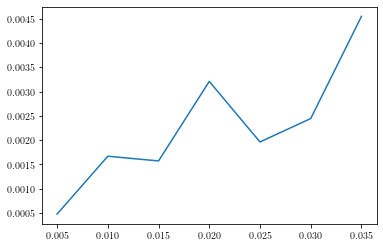

In [3]:
from matplotlib import rc
rc('text', usetex=True)

plt.plot(ds, outputvs)
plt.show()